In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_signal(signal_x, signal_y, window_x=None, window_y=None):

  figure(figsize=(14,11))

  plot(signal_x/2/pi, signal_y)
  if window_x is not None:
    plot(window_x/2/pi, window_y)
  
  tick_params(axis='both', labelsize=20)
  title('Signal', fontsize=20)
  xlabel('t, cycles', fontsize=20)
  ylabel('signal, arb.units', fontsize=20) 

def plot_spectrum(freq, power):
  figure(figsize=(14,11))
  plot(freq, abs(power)**2)
  xlim(0,6)

  tick_params(axis='both', labelsize=20)
  title('Signal spectrum', fontsize=20)
  xlabel('Frequency, arb. units', fontsize=20)
  ylabel('Power spectrum, arb. units', fontsize=20)


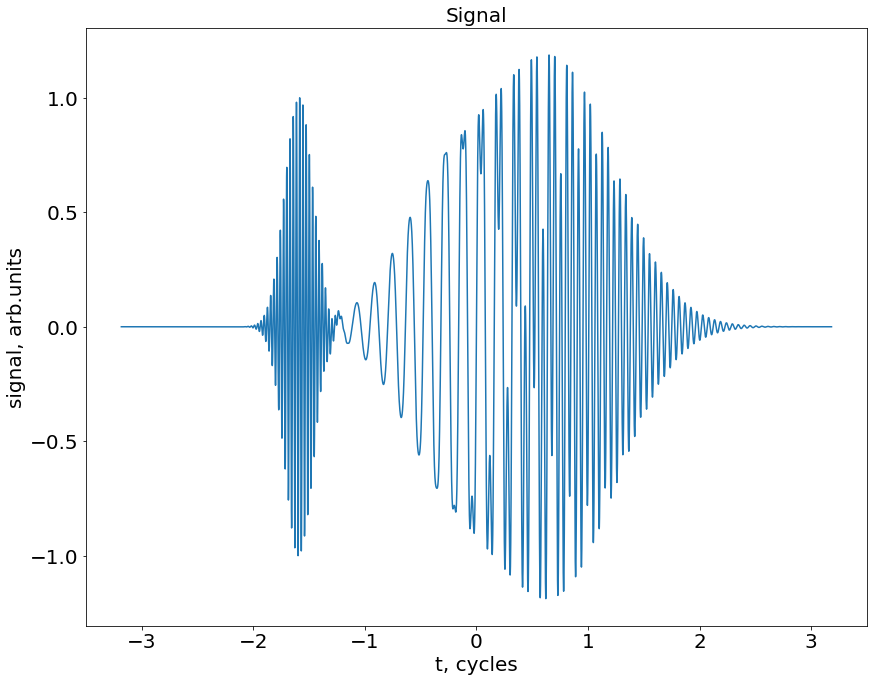

In [3]:
t=np.linspace(-20*2*pi, 20*2*pi, 3**9+6)

y=np.sin(t)*exp(-t**2/2/20**2) # centered around zero, simple gaussian wavelet, freq 1

y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2) # centered around 5*2*pi (5), freq 3
y=y+np.sin(5.5*t)*exp(-(t+10*2*pi)**2/2/5**2) # centered around -10*2*pi (-10), freq 5.5

plot_signal(t/2/pi, y)

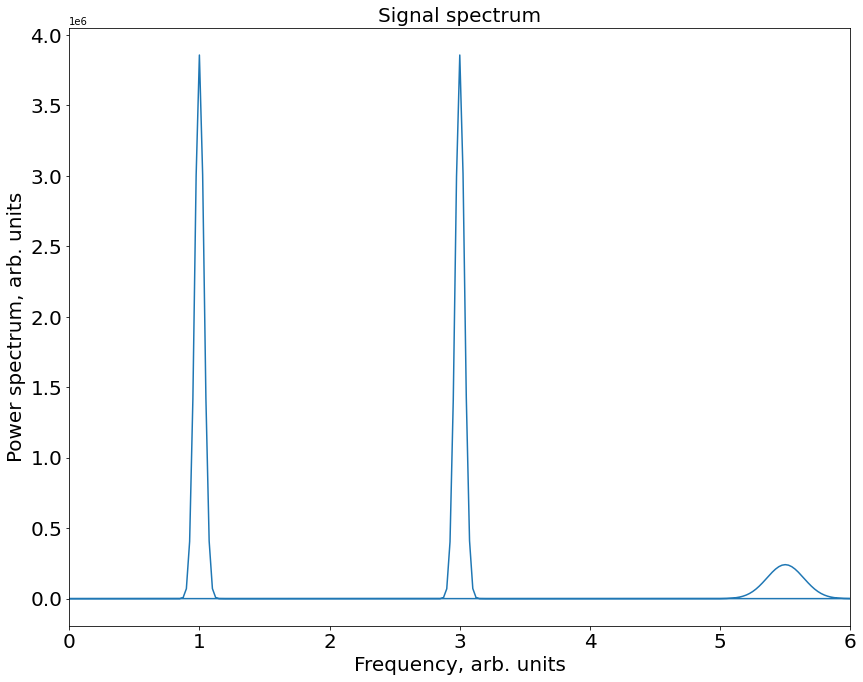

In [4]:
# Fourier spectrum
sp=np.fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi) #what frequencies are there. Frequency decomposition

plot_spectrum(w, sp)

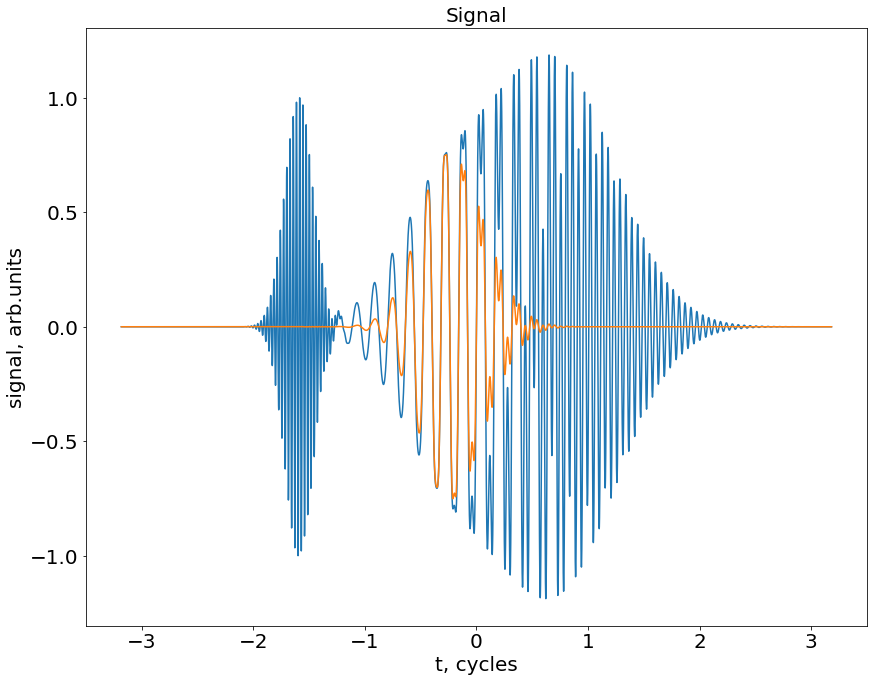

In [5]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width = 2.0 * 2 * pi
window_position = -2 * 2 * pi
window_function = exp(-(t - window_position) ** 2 / 2/ window_width ** 2)

y_window = y * window_function

plot_signal(t/2/pi, y, t/2/pi, y_window)

# now do the same for different window positions and plot 2D graph
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum


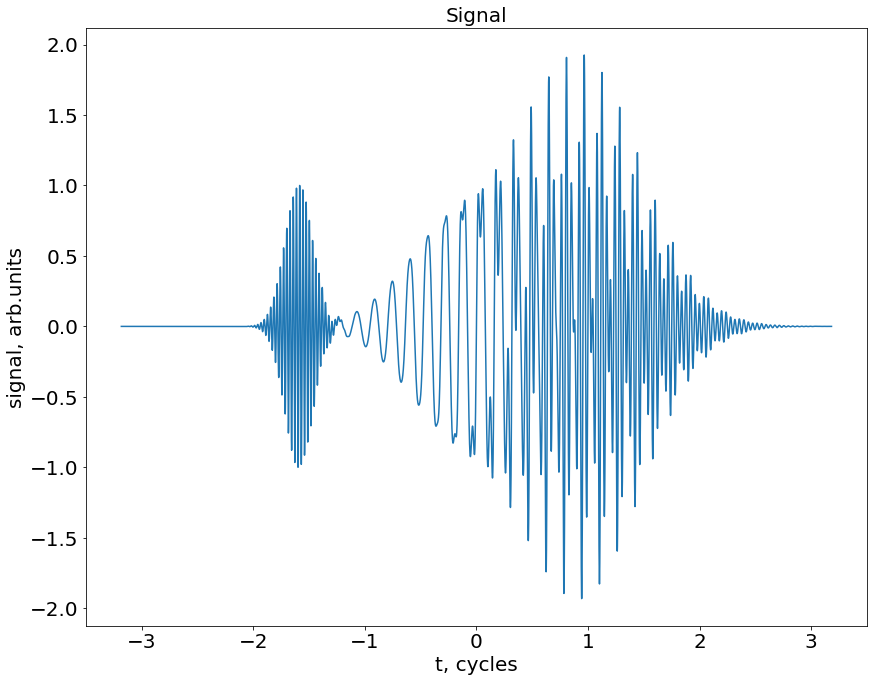

In [6]:
#4th wave packet

y_wave = y + np.sin(4 * t) * exp(-(t - 7 * 2 * pi)** 2 / 2 / 20 ** 2)

plot_signal(t / 2 / pi, y_wave)

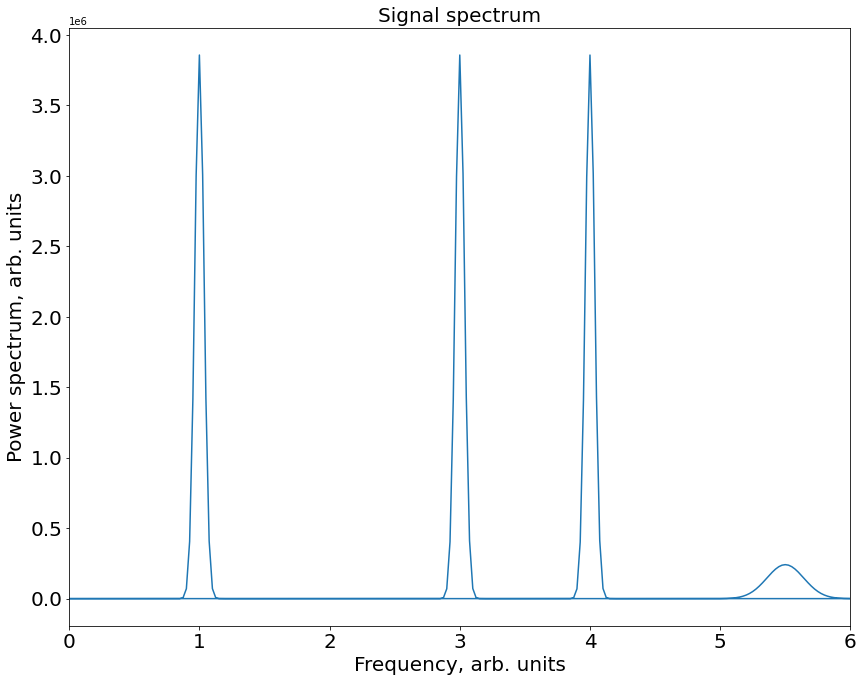

In [7]:
# Fourier spectrum
sp = fft.fft(y_wave)
w = fftfreq(len(y_wave), d = (t[1] - t[0]) / 2 / pi)

plot_spectrum(w, sp)

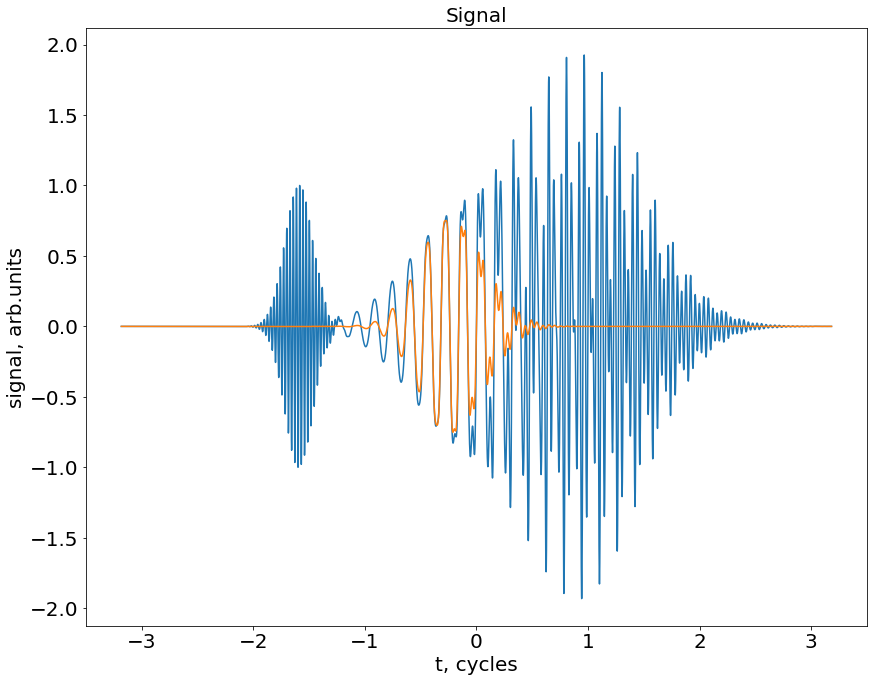

In [8]:
plot_signal(t/2/pi, y_wave, t/2/pi, y_window)

In [3]:
from tqdm import tqdm_notebook

def get_specgram(y, t, nwindowsteps=1000):

    # your implementation here
    t_window = np.linspace(-20*2*pi, 20*2*pi, nwindowsteps)
    window_width = 2.0 * 2 * pi

    specgram = np.empty([len(t), nwindowsteps])

    for n, t_w in enumerate(t_window):
      window_function = exp(-(t - t_w) ** 2 / 2/ window_width ** 2)
      y_window = y * window_function

      specgram[:, n] = abs(fft.fft(y_window))

    return specgram

In [4]:
# plot spectrogram, explain what you see

t = np.linspace(-20*2*pi, 20*2*pi, 3**9+6)

y=np.sin(t)*exp(-t**2/2/20**2)

y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*exp(-(t+10*2*pi)**2/2/5**2)

spec = get_specgram(y, t, 1000)

sp=np.fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
# spec_wave = get_specgram(y_wave, t, 1000)

Text(0, 0.5, 'Frequency')

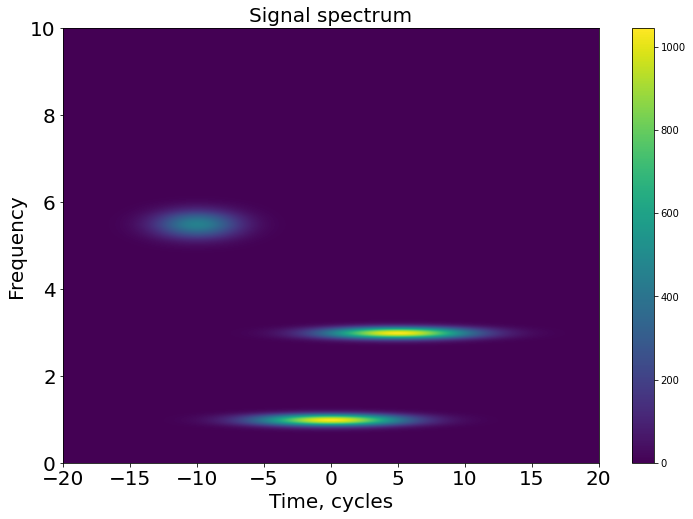

In [6]:

figure(figsize=(12,8))
imshow(spec, aspect='auto', extent=[min(t)/(2*np.pi), max(t)/(2*np.pi), 0, 2 * w[int(len(sp)/2)-1]])
colorbar()

ylim(0,10)

tick_params(axis='both', labelsize=20)
title('Signal spectrum', fontsize=20)
xlabel('Time, cycles', fontsize=20)
ylabel('Frequency', fontsize=20)

Text(0, 0.5, 'Frequency')

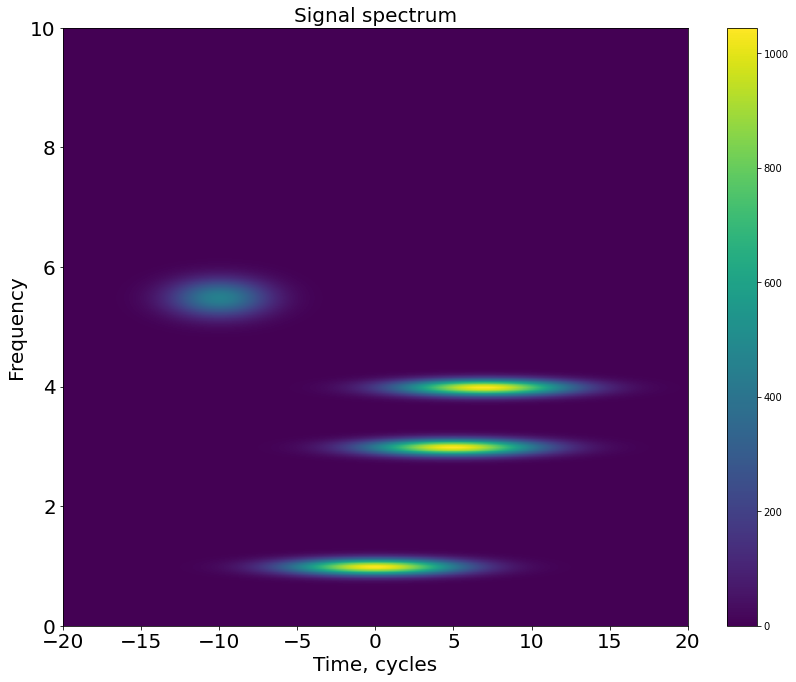

In [20]:

figure(figsize=(14,11))
imshow(spec_wave, aspect='auto', extent=[min(t)/(2*np.pi), max(t)/(2*np.pi), 0, 2 * w[int(len(sp)/2)-1]])
colorbar()

ylim(0,10)

tick_params(axis='both', labelsize=20)
title('Signal spectrum', fontsize=20)
xlabel('Time, cycles', fontsize=20)
ylabel('Frequency', fontsize=20)

In [26]:
def y_signal(timestamps):
  t = np.linspace(-20*2*pi, 20*2*pi, timestamps)

  y = np.sin(t)*exp(-t**2/2/20**2)

  y = y + np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
  y = y + np.sin(5.5*t)*exp(-(t+10*2*pi)**2/2/5**2)
  y_wave = y + np.sin(4 * t) * exp(-(t - 7 * 2 * pi)** 2 / 2 / 20 ** 2)

  return y_wave, t

In [27]:
y_wave, t = y_signal(3**9 + 6)
y_wave_1, t_1 = y_signal(2**14)
y_wave_2, t_2 = y_signal(2**14 + 10)
y_wave_3, t_3 = y_signal(2**14 - 10)

In [29]:
%timeit get_specgram(y_wave, t)
%timeit get_specgram(y_wave_1, t_1)
%timeit get_specgram(y_wave_2, t_2)
%timeit get_specgram(y_wave_3, t_3)

1 loop, best of 3: 4.71 s per loop
1 loop, best of 3: 1.14 s per loop
1 loop, best of 3: 3.78 s per loop
1 loop, best of 3: 3.43 s per loop


In [30]:
min(w)

-246.08750063478772

In [32]:
2 * w[int(len(sp)/2)-1]

492.12500380906454